# Exercise 2 B

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm

In [5]:
df = pd.read_excel('traveldata.xlsx')

In [6]:
df

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8
5,77,3,3.57,6.4
6,80,3,3.03,7.0
7,66,2,3.51,5.6
8,109,5,3.54,7.3
9,76,3,3.25,6.4


## A. Correlation

### Check the relationships between each independent variable and the dependent variable using scatterplots and correlations.

1. Create scatter plot between miles traveled and travel time

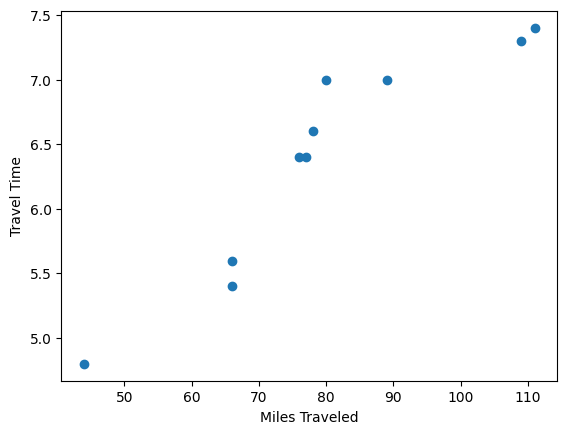

In [7]:
plt.scatter(df["Miles Traveled"],
            df["Travel Time"])

plt.xlabel("Miles Traveled")
plt.ylabel("Travel Time")
plt.show()

2. Create scatter plot between number of deliveries and travel time

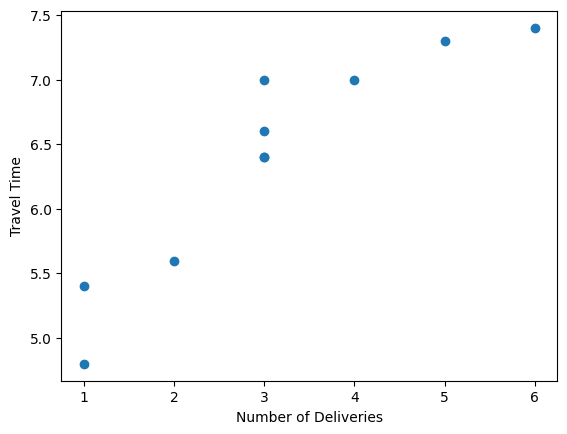

In [8]:
plt.scatter(df["Number of Deliveries"],
            df["Travel Time"])

plt.xlabel("Number of Deliveries")
plt.ylabel("Travel Time")
plt.show()

3. Create scatter plot between Gas Price and Travel time

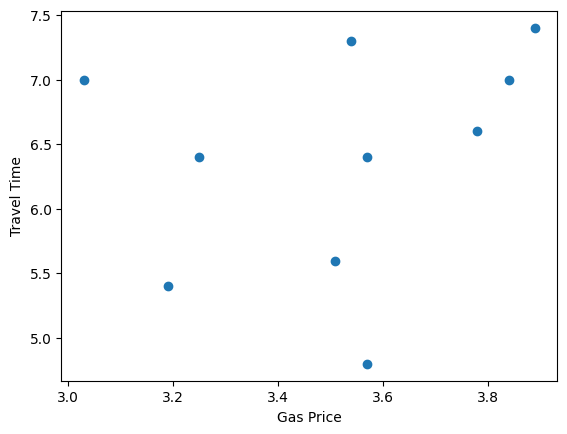

In [9]:
plt.scatter(df["Gas Price"],
            df["Travel Time"])

plt.xlabel("Gas Price")
plt.ylabel("Travel Time")
plt.show()

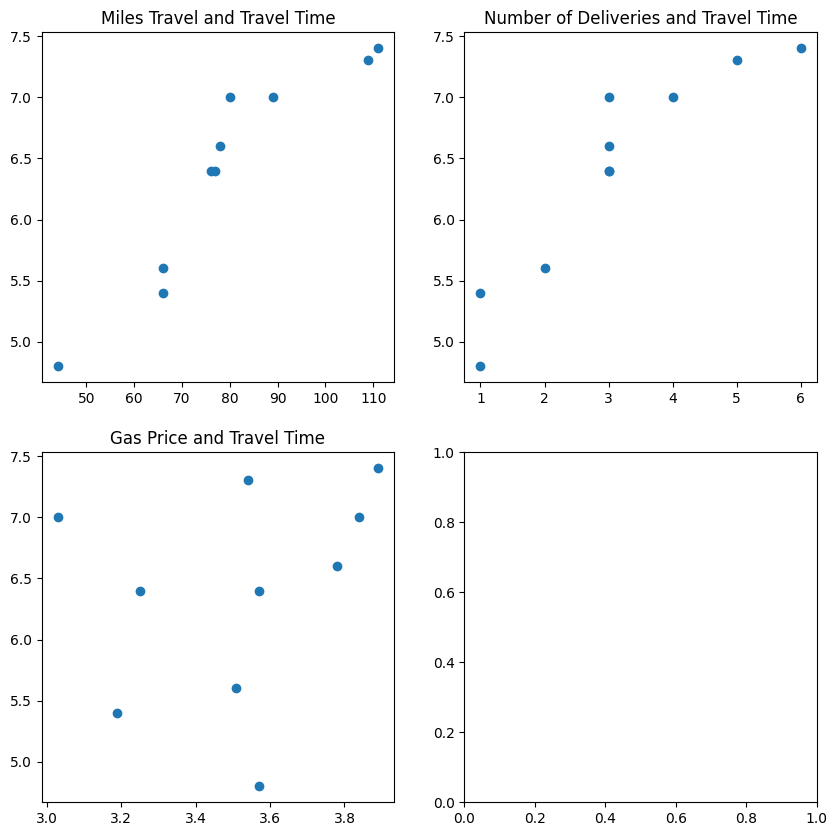

In [10]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0, 0].scatter(df["Miles Traveled"], df["Travel Time"])
ax[0, 1].scatter(df["Number of Deliveries"], df["Travel Time"])
ax[1, 0].scatter(df["Gas Price"], df["Travel Time"])

ax[0, 0].set_title("Miles Travel and Travel Time")
ax[0, 1].set_title("Number of Deliveries and Travel Time")
ax[1, 0].set_title("Gas Price and Travel Time")
plt.show()


4. Create a pairplot

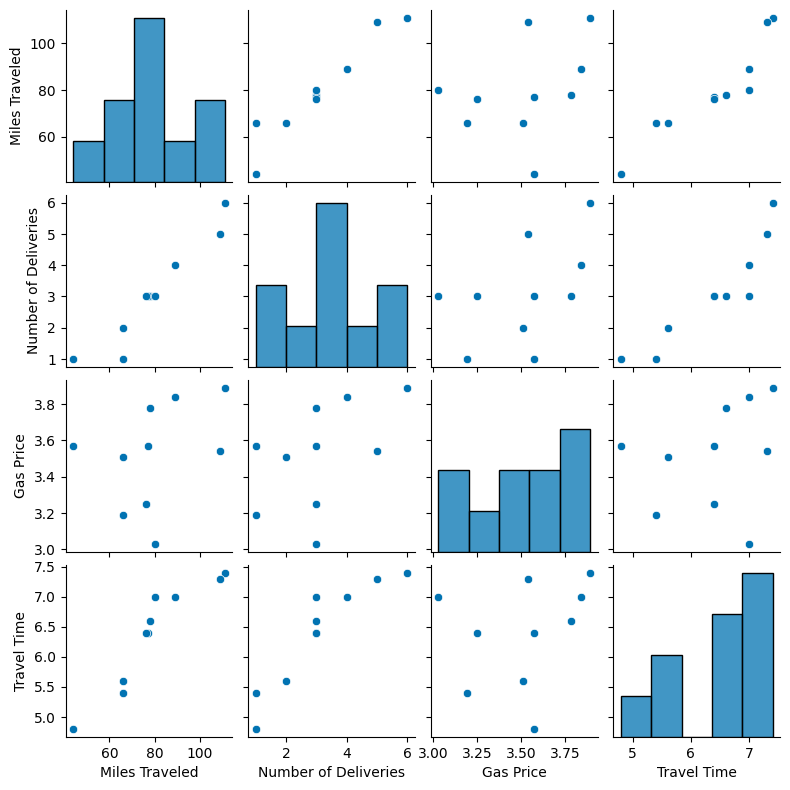

In [11]:
sns.set_palette('colorblind')
sns.pairplot(data=df, height=2)

5. Calculate pearson's correlation coefficient and p-value between Miles Traveled and Travel Time

In [12]:
result = pearsonr(df['Miles Traveled'], df['Travel Time'])
print("Miles Traveled and Travel Time")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Miles Traveled and Travel Time
correlation coefficient: 0.928178500887476
p-value: 0.00010667565429896801


6. Calculate pearson's correlation coefficient and p-value between Number of Deliveries and Travel Time

In [13]:
result = pearsonr(df['Number of Deliveries'], df['Travel Time'])
print("Number of Deliveries and Travel Time")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Number of Deliveries and Travel Time
correlation coefficient: 0.9164433964470268
p-value: 0.00019260878342962958


7. Calculate pearson's correlation coefficient and p-value between Gas Price and Travel Time

In [14]:
result = pearsonr(df['Gas Price'], df['Travel Time'])
print("Gas Price and Travel Time")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Gas Price and Travel Time
correlation coefficient: 0.2672115310193847
p-value: 0.45545341268508155


### Check the relationships among the independent variables using scatterplots and correlations.

8. Create scatter plot between Miles Traveled and Number of Deliveries.

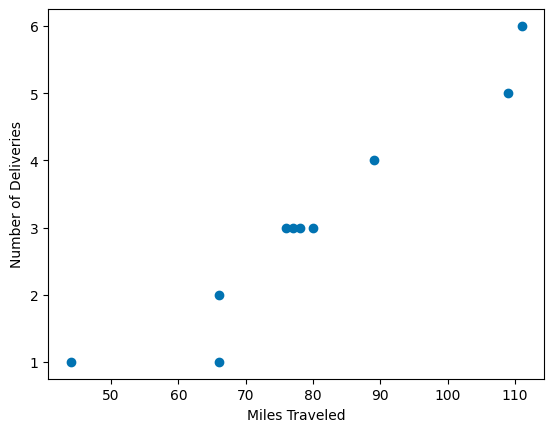

In [15]:
plt.scatter(df["Miles Traveled"],
            df["Number of Deliveries"])

plt.xlabel("Miles Traveled")
plt.ylabel("Number of Deliveries")
plt.show()

9. Create scatter plot between Miles traveled and Gas Price

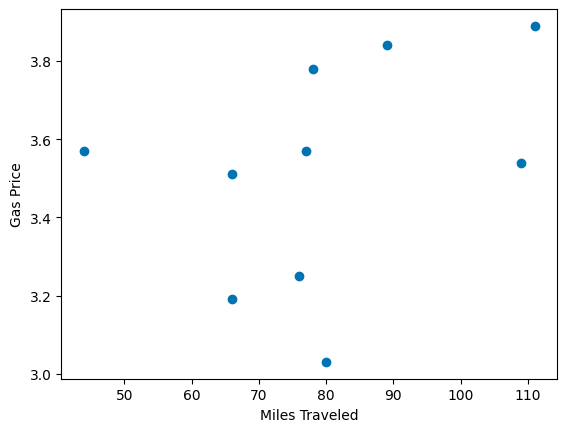

In [16]:
plt.scatter(df["Miles Traveled"],
            df["Gas Price"])

plt.xlabel("Miles Traveled")
plt.ylabel("Gas Price")
plt.show()

10. Create scatter plot between Number of Deliveries and Gas Price

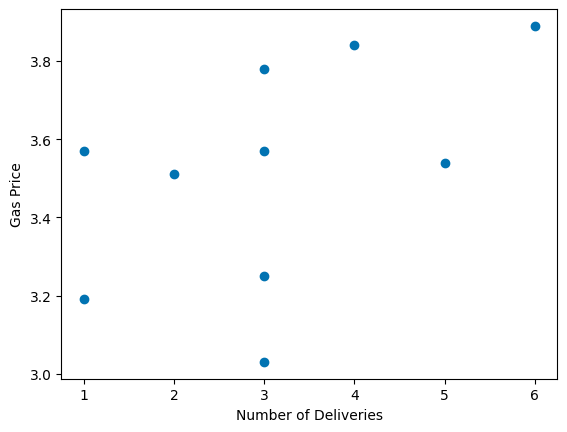

In [17]:
plt.scatter(df["Number of Deliveries"],
            df["Gas Price"])

plt.xlabel("Number of Deliveries")
plt.ylabel("Gas Price")
plt.show()

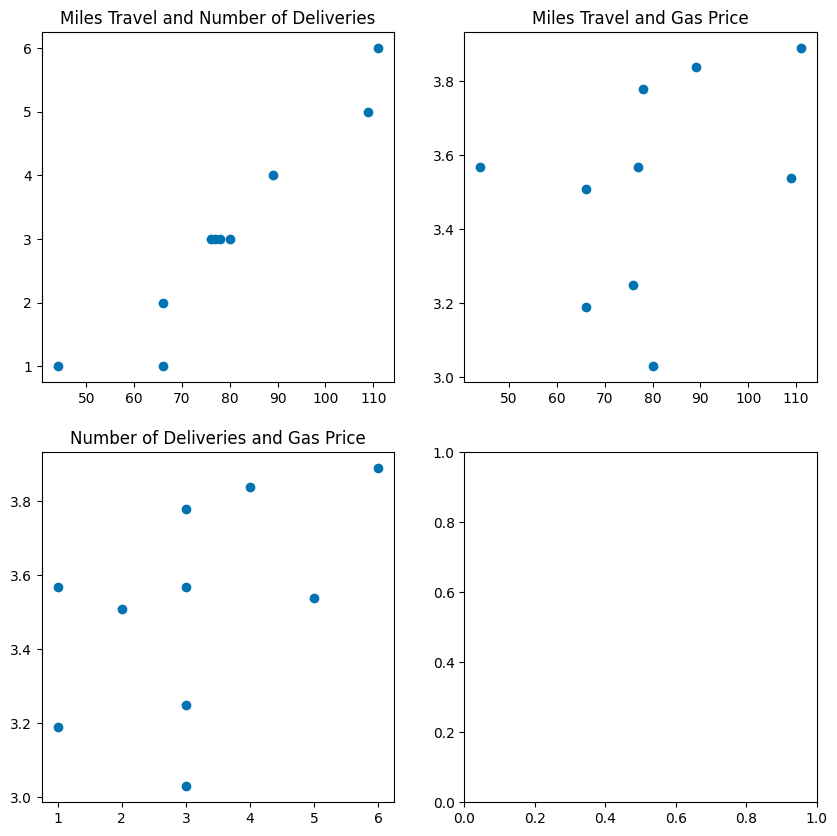

In [18]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0, 0].scatter(df["Miles Traveled"], df["Number of Deliveries"])
ax[0, 1].scatter(df["Miles Traveled"], df["Gas Price"])
ax[1, 0].scatter(df["Number of Deliveries"], df["Gas Price"])

ax[0, 0].set_title("Miles Travel and Number of Deliveries")
ax[0, 1].set_title("Miles Travel and Gas Price")
ax[1, 0].set_title("Number of Deliveries and Gas Price")
plt.show()

11. Calculate pearson's correlation coefficient and p-value between Miles Traveled and Number of Deliveries

In [19]:
result = pearsonr(df['Miles Traveled'], df['Number of Deliveries'])
print("Miles Traveled and Number of Deliveries")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Miles Traveled and Number of Deliveries
correlation coefficient: 0.9558982066200347
p-value: 1.5690314407660616e-05


12. Calculate pearson's correlation coefficient and p-value between Miles Traveled and Gas Price

In [20]:
result = pearsonr(df['Miles Traveled'], df['Gas Price'])
print("Miles Traveled and Gas Price")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Miles Traveled and Gas Price
correlation coefficient: 0.35579623354708517
p-value: 0.31296405908178965


13. Calculate pearson's correlation coefficient and p-value between Number of Deliveries and Gas Price

In [21]:
result = pearsonr(df['Number of Deliveries'], df['Gas Price'])
print("Number of Deliveries and Gas Price")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Number of Deliveries and Gas Price
correlation coefficient: 0.4982421647401633
p-value: 0.142741207670319


### Correlation Summary

14. Create the correlation summary

In [22]:
correlation = df.corr()
correlation

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
Miles Traveled,1.000000,0.955898,0.355796,0.928179
Number of Deliveries,0.955898,1.000000,0.498242,0.916443
Gas Price,0.355796,0.498242,1.000000,0.267212
Travel Time,0.928179,0.916443,0.267212,1.000000


15. Create a correlation matrix

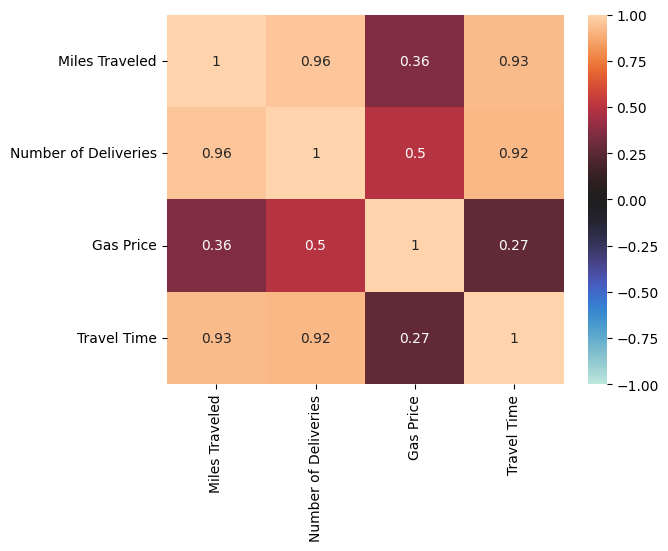

In [23]:
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

## Building Different Regression Models

Find the best regression model

**Miles Traveled and Travel Time**

16. Set independent and dependent variables

In [24]:
X = df[['Miles Traveled']]
X = sm.add_constant(X)
y = df['Travel Time']

17. Build and train the model

In [28]:
mlr_model = LinearRegression()

mlr_model.fit(X, y)

y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 3.1855602489995554
Coefficients: [0.         0.04025678]


18. Display the statistical summary

In [29]:
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     49.77
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           0.000107
Time:                        15:37:37   Log-Likelihood:                -2.3532
No. Observations:                  10   AIC:                             8.706
Df Residuals:                       8   BIC:                             9.312
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1856      0.467      6.822      0.000       2.109       4.262
Miles Traveled     0.0403      0.006      7.055      0.000       0.027       0.053
==============================================================================
Omnibus:                        0.542   Durbin-Watson:                   2.608
Prob(Omnibus):                  0.763   Jarque-Bera (JB):                0.554
Skew:                           0.370   Prob(JB):                        0.758
Kurtosis:                       2.115   Cond. No.                         353.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

19. Display the $R^2$

In [30]:
print(olsmod.rsquared)

0.8615153295097224


**Number of Deliveries and Travel Time**

In [31]:
# Set independent and dependent variables
X = df[['Number of Deliveries']]
X = sm.add_constant(X)
y = df['Travel Time']

In [32]:
# Build and train the model
mlr_model = LinearRegression()

mlr_model.fit(X, y)

y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 4.84541484716157
Coefficients: [0.         0.49825328]


In [33]:
# Display the statistical summary
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     41.96
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           0.000193
Time:                        15:39:47   Log-Likelihood:                -3.0794
No. Observations:                  10   AIC:                             10.16
Df Residuals:                       8   BIC:                             10.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.8454      0.265     18.261      0.000       4.234       5.457
Number of Deliveries     0.4983      0.077      6.478      0.000       0.321       0.676
==============================================================================
Omnibus:                        0.391   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.065
Skew:                           0.147   Prob(JB):                        0.968
Kurtosis:                       2.736   Cond. No.                         8.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Display the R(squared)
print(olsmod.rsquared)

0.8398684988913625


**Gas Price and Travel Time**

In [35]:
# Set independent and dependent variables
X = df[['Gas Price']]
X = sm.add_constant(X)
y = df['Travel Time']

In [36]:
# Build and train the model
mlr_model = LinearRegression()

mlr_model.fit(X, y)

y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 3.536488198199421
Coefficients: [0.         0.81134825]


In [37]:
# Display the statistical summary
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.6151
Date:                Sat, 30 Aug 2025   Prob (F-statistic):              0.455
Time:                        15:44:24   Log-Likelihood:                -11.868
No. Observations:                  10   AIC:                             27.74
Df Residuals:                       8   BIC:                             28.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5365      3.649      0.969      0.361      -4.878      11.951
Gas Price      0.8113      1.034      0.784      0.455      -1.574       3.197
==============================================================================
Omnibus:                        1.232   Durbin-Watson:                   2.823
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                0.765
Skew:                          -0.619   Prob(JB):                        0.682
Kurtosis:                       2.451   Cond. No.                         49.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Display the R(squared)
print(olsmod.rsquared)

0.07140200230972338


**Miles Traveled, Number of Deliveries and Travel Time**

In [39]:
# Set independent and dependent variables
X = df[['Miles Traveled', 'Number of Deliveries']]
X = sm.add_constant(X)
y = df['Travel Time']

In [40]:
# Build and train the model
mlr_model = LinearRegression()

mlr_model.fit(X, y)

y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 3.732158131682609
Coefficients: [0.         0.02622257 0.18404052]


In [41]:
# Display the statistical summary
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     23.72
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           0.000763
Time:                        15:45:58   Log-Likelihood:                -1.9830
No. Observations:                  10   AIC:                             9.966
Df Residuals:                       7   BIC:                             10.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.7322      0.887      4.208      0.004       1.635       5.830
Miles Traveled           0.0262      0.020      1.310      0.232      -0.021       0.074
Number of Deliveries     0.1840      0.251      0.733      0.487      -0.409       0.777
==============================================================================
Omnibus:                        1.340   Durbin-Watson:                   2.402
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.867
Skew:                           0.654   Prob(JB):                        0.648
Kurtosis:                       2.393   Cond. No.                         670.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Display the R(squared)
print(olsmod.rsquared)

0.871399502997586


**Miles Travel, Gas Price and Travel Time**

In [43]:
# Set independent and dependent variables
X = df[['Miles Traveled', 'Gas Price']]
X = sm.add_constant(X)
y = df['Travel Time']

In [44]:
# Build and train the model
mlr_model = LinearRegression()

mlr_model.fit(X, y)

y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 3.867569888312455
Coefficients: [ 0.          0.04137042 -0.21912293]


In [45]:
# Display the statistical summary
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     22.63
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           0.000879
Time:                        15:49:46   Log-Likelihood:                -2.1863
No. Observations:                  10   AIC:                             10.37
Df Residuals:                       7   BIC:                             11.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.8676      1.482      2.609      0.035       0.362       7.373
Miles Traveled     0.0414      0.006      6.445      0.000       0.026       0.057
Gas Price         -0.2191      0.449     -0.488      0.641      -1.282       0.844
==============================================================================
Omnibus:                        0.731   Durbin-Watson:                   2.740
Prob(Omnibus):                  0.694   Jarque-Bera (JB):                0.563
Skew:                           0.025   Prob(JB):                        0.755
Kurtosis:                       1.839   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# Display the R(squared)
print(olsmod.rsquared)

0.8660640485080335


**Number of Deliveries, Gas Price and Travel Time**

In [47]:
# Set independent and dependent variables
X = df[['Number of Deliveries', 'Gas Price']]
X = sm.add_constant(X)
y = df['Travel Time']

In [48]:
# Build and train the model
mlr_model = LinearRegression()

mlr_model.fit(X, y)

y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 7.324307017016417
Coefficients: [ 0.          0.56650081 -0.76498707]


In [49]:
# Display the statistical summary
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     27.63
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           0.000476
Time:                        15:49:56   Log-Likelihood:                -1.3104
No. Observations:                  10   AIC:                             8.621
Df Residuals:                       7   BIC:                             9.529
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.3243      1.458      5.025      0.002       3.878      10.771
Number of Deliveries     0.5665      0.079      7.129      0.000       0.379       0.754
Gas Price               -0.7650      0.444     -1.724      0.128      -1.814       0.284
==============================================================================
Omnibus:                        1.321   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                0.811
Skew:                           0.339   Prob(JB):                        0.667
Kurtosis:                       1.781   Cond. No.                         71.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Display the R(squared)
print(olsmod.rsquared)

0.8875862701921513


**Miles Traveled, Number of Deliveries, Gas Price and Travel Time**

In [51]:
# Set independent and dependent variables
X = df[['Miles Traveled', 'Number of Deliveries', 'Gas Price']]
X = sm.add_constant(X)
y = df['Travel Time']

In [52]:
# Build and train the model
mlr_model = LinearRegression()

mlr_model.fit(X, y)

y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 6.211377663979402
Coefficients: [ 0.          0.01412189  0.38315024 -0.60655271]


In [53]:
# Display the statistical summary
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     16.99
Date:                Sat, 30 Aug 2025   Prob (F-statistic):            0.00245
Time:                        15:50:08   Log-Likelihood:               -0.98426
No. Observations:                  10   AIC:                             9.969
Df Residuals:                       6   BIC:                             11.18
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.2114      2.321      2.677      0.037       0.533      11.890
Miles Traveled           0.0141      0.022      0.636      0.548      -0.040       0.068
Number of Deliveries     0.3832      0.300      1.277      0.249      -0.351       1.117
Gas Price               -0.6066      0.527     -1.152      0.293      -1.895       0.682
==============================================================================
Omnibus:                        2.874   Durbin-Watson:                   2.406
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.204
Skew:                           0.457   Prob(JB):                        0.548
Kurtosis:                       1.567   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Display the R(squared)
print(olsmod.rsquared)

0.8946842692569462
